# Data Movie

Learning Objective:
1. Data Cleaning and Preparation
2. Analyzing annual temperature trends in Tapanuli
3. Determining the number of days with each type of rainfall each year
4. Determining the number of days with each type of sunlight each year
5. Key Correlation Analysis Between Max_Wind, Max_Wind_Direction, Avg_Wind, and Most_Wind_Direction

In [373]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data
tapanuli = pd.read_excel("tapanuli1990-1999.xlsx")


In [374]:
# See the data
tapanuli.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Keterangan :
0,1990-01-01,22.0,32.0,25.6,86,13,4.9,3,270,3,W,8888: data tidak terukur
1,1990-01-02,22.0,33.5,26.0,85,0,2.6,4,340,4,N,9999: Tidak Ada Data (tidak dilakukan pengukuran)
2,1990-01-03,22.0,34.1,26.5,81,1,4.3,4,180,4,S,Tn: Temperatur minimum\t (°C)
3,1990-01-04,22.0,32.8,25.8,79,0,6.2,4,310,4,NW,Tx: Temperatur maksimum (°C)
4,1990-01-05,22.0,32.4,25.4,83,0,6.8,0,0,0,N,Tavg: Temperatur rata-rata (°C)


# 1. Cleaning Data and Prepartion

In [375]:
# Drop Column Keterangan
clean_tapanuli = tapanuli.drop(['Keterangan :'], axis = 1)

In [376]:
clean_tapanuli.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,1990-01-01,22.0,32.0,25.6,86,13,4.9,3,270,3,W
1,1990-01-02,22.0,33.5,26.0,85,0,2.6,4,340,4,N
2,1990-01-03,22.0,34.1,26.5,81,1,4.3,4,180,4,S
3,1990-01-04,22.0,32.8,25.8,79,0,6.2,4,310,4,NW
4,1990-01-05,22.0,32.4,25.4,83,0,6.8,0,0,0,N


In [377]:
# Check Missing Value
clean_tapanuli.isna().sum()/len(clean_tapanuli)*100

Date        0.000000
Tn          0.054765
Tx          0.000000
Tavg        0.000000
RH_avg      0.000000
RR          0.000000
ss         14.047097
ff_x        0.000000
ddd_x       0.000000
ff_avg      0.000000
ddd_car     0.000000
dtype: float64

In [378]:
# Fill missing values with the next available value
clean_tapanuli = clean_tapanuli.bfill()

In [379]:
# Recheck missing value
clean_tapanuli.isna().sum()/len(clean_tapanuli)*100

Date       0.0
Tn         0.0
Tx         0.0
Tavg       0.0
RH_avg     0.0
RR         0.0
ss         0.0
ff_x       0.0
ddd_x      0.0
ff_avg     0.0
ddd_car    0.0
dtype: float64

In [380]:
# Check duplicate value
duplicate = clean_tapanuli.duplicated().sum()
print("How many duplicate in data ? %d" % (duplicate))

How many duplicate in data ? 0


In [381]:
clean_tapanuli.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,1990-01-01,22.0,32.0,25.6,86,13,4.9,3,270,3,W
1,1990-01-02,22.0,33.5,26.0,85,0,2.6,4,340,4,N
2,1990-01-03,22.0,34.1,26.5,81,1,4.3,4,180,4,S
3,1990-01-04,22.0,32.8,25.8,79,0,6.2,4,310,4,NW
4,1990-01-05,22.0,32.4,25.4,83,0,6.8,0,0,0,N


In [382]:
# Rename column 
clean_tapanuli.rename(index=str,
columns={
"Tn":"Min_Temp",
"Tx":"Max_Temp",
"Tavg":"Avg_Temp",
"RH_avg":"Avg_Humidity",
"RR":"Rainfall",
"ss":"Duration_Of_Sunlight",
"ff_x":"Max_Wind",
"ddd_x":"Max_Wind_Direction",
"ff_avg":"Avg_Wind",
"ddd_car":"Most_Wind_Direction"}, inplace=True)
clean_tapanuli.columns

Index(['Date', 'Min_Temp', 'Max_Temp', 'Avg_Temp', 'Avg_Humidity', 'Rainfall',
       'Duration_Of_Sunlight', 'Max_Wind', 'Max_Wind_Direction', 'Avg_Wind',
       'Most_Wind_Direction'],
      dtype='object')

In [383]:
clean_tapanuli.head()

,Date,Min_Temp,Max_Temp,Avg_Temp,Avg_Humidity,Rainfall,Duration_Of_Sunlight,Max_Wind,Max_Wind_Direction,Avg_Wind,Most_Wind_Direction
0,1990-01-01,22.0,32.0,25.6,86,13,4.9,3,270,3,W
1,1990-01-02,22.0,33.5,26.0,85,0,2.6,4,340,4,N
2,1990-01-03,22.0,34.1,26.5,81,1,4.3,4,180,4,S
3,1990-01-04,22.0,32.8,25.8,79,0,6.2,4,310,4,NW
4,1990-01-05,22.0,32.4,25.4,83,0,6.8,0,0,0,N


In [384]:
# Extract year and month from the Date column
clean_tapanuli['Year'] = pd.DatetimeIndex(clean_tapanuli['Date']).year
clean_tapanuli['Month'] = pd.DatetimeIndex(clean_tapanuli['Date']).month

# 2. Analyzing annual temperature trends in Tapanuli

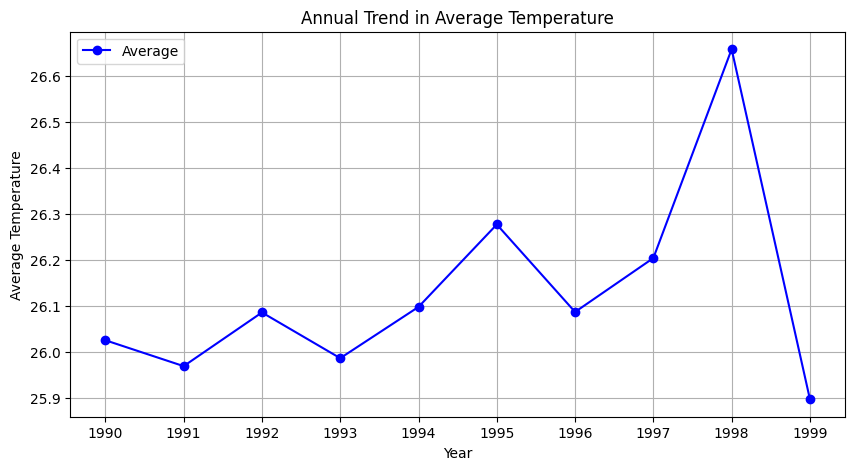

In [385]:
# Calculate average temperature per year
mean_temp = clean_tapanuli.groupby('Year')['Avg_Temp'].mean()

# Plot the yearly temperature trend
plt.figure(figsize=(10, 5))
plt.plot(mean_temp, marker='o', color='blue', label='Average')
plt.title('Annual Trend in Average Temperature')
plt.ylabel('Average Temperature')
plt.xlabel('Year')
plt.xticks(list(range(1990, 2000)), rotation=0)
plt.legend()
plt.grid()
plt.show()

The average annual temperature in Tapanuli was unstable from 1990-1997, then in 1998 there was a high increase with approximately 26.6 degrees and a decrease in 1999 with 25.9 degrees.

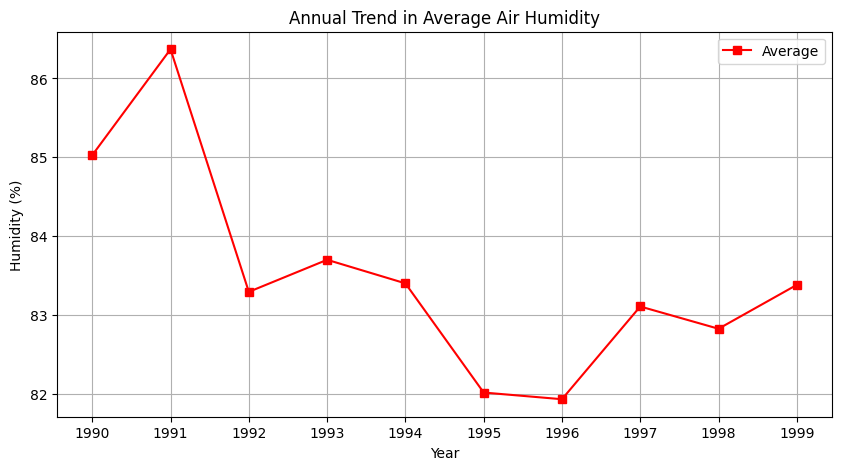

In [386]:
# Calculate minimum average humidity per year
avg_humidity = clean_tapanuli.groupby('Year')['Avg_Humidity'].mean()

# Plot the yearly humidity trend
plt.figure(figsize=(10, 5))
plt.plot(avg_humidity, marker='s', color='red', label='Average')
plt.title('Annual Trend in Average Air Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Year')
plt.xticks(list(range(1990,2000)), rotation=0)
plt.legend()
plt.grid()
plt.show()

The humidity trend in Tapanuli ranges from 82% to over 86%. Looking at 1990-1991 there was a slight increase of just over 1% reaching the highest level in 1991 with humidity around 86% and before declining to 83%. The lowest humidity was in 1996 around 82% and fluctuating until 1999.

# 3. Determining the number of days with each type of rainfall each year

In [387]:
def rainfall_analysis(clean_tapanuli):
    rainfall_category = {
        "Cloudy": 0,
        "Light rain": 0,
        "Moderate rain": 0,
        "Heavy rain": 0,
        "Very heavy rain": 0,
        "Extreme rain": 0
    }
    rainfall_list = []

    for i in clean_tapanuli['Rainfall']:
        if i == 0:
            rainfall_category["Cloudy"] += 1
            rainfall_list.append("Cloudy")
        elif 0.5 < i <= 20:
            rainfall_category["Light rain"] += 1
            rainfall_list.append("Light rain")
        elif 20 < i <= 50:
            rainfall_category["Moderate rain"] += 1
            rainfall_list.append("Moderate rain")
        elif 50 < i <= 100:
            rainfall_category["Heavy rain"] += 1
            rainfall_list.append("Heavy rain")
        elif 100 < i <= 150:
            rainfall_category["Very heavy rain"] += 1
            rainfall_list.append("Very heavy rain")
        elif i > 150:
            rainfall_category["Extreme rain"] += 1
            rainfall_list.append("Extreme rain")

    clean_tapanuli['rainfall_category'] = rainfall_list
    return clean_tapanuli

clean_tapanuli = rainfall_analysis(clean_tapanuli)

In [388]:
categorize_rainfall = clean_tapanuli.groupby(['Year', 'rainfall_category']).size().unstack(fill_value=0)

print("Number of Days by Rainfall Category")
categorize_rainfall = categorize_rainfall[['Cloudy', 'Light rain', 'Moderate rain', 'Heavy rain', 'Very heavy rain', 'Extreme rain']]
categorize_rainfall.index = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999']
categorize_rainfall.loc['Total'] = categorize_rainfall.sum()
print(categorize_rainfall)

Number of Days by Rainfall Category
rainfall_category  Cloudy  Light rain  Moderate rain  Heavy rain  \
1990                  168         133             46          12   
1991                  146         130             52          28   
1992                  152         142             56          13   
1993                  141         148             40          36   
1994                  152         142             50          18   
1995                  144         142             49          26   
1996                  173         131             37          20   
1997                  196         130             24          15   
1998                  145         140             48          25   
1999                  141         145             56          16   
Total                1558        1383            458         209   

rainfall_category  Very heavy rain  Extreme rain  
1990                             6             0  
1991                             7           

Rainfall trends in Tapanuli include high cloudiness with a total of 1,558 rain events and light rain in Tapanuli City with a total of 1,383 rain events. Extreme rainfall events occurred in 1990, 1992, 1993, 1994, and 1997. The year with the highest incidence of light rain was 1993.

# 4. Determining the number of days with each type of sungliht each year

In [389]:
def duration_of_sunlight(clean_tapanuli):
    category_sunlight = {
        "Low danger": 0,
        "Medium danger": 0,
        "High danger": 0,
        "Very high danger": 0,
    }
    sunglight_list = []

    for s in clean_tapanuli['Duration_Of_Sunlight']:
        if s <= 2:
            category_sunlight["Low danger"] += 1
            sunglight_list.append("Low danger")
        elif 2 < s <= 5:
            category_sunlight["Medium danger"] += 1
            sunglight_list.append("Medium danger")
        elif 5 < s <= 7:
            category_sunlight["High danger"] += 1
            sunglight_list.append("High danger")
        elif s > 7:
            category_sunlight["Very high danger"] += 1
            sunglight_list.append("Very high danger")

    clean_tapanuli['category_sunlight'] = sunglight_list
    return clean_tapanuli

clean_tapanuli = duration_of_sunlight(clean_tapanuli)

In [390]:
categorize_sunlight = clean_tapanuli.groupby(['Year', 'category_sunlight']).size().unstack(fill_value=0)

print("Number of Days According to Sunlight Category")
categorize_sunlight = categorize_sunlight[['Low danger', 'Medium danger', 'High danger', 'Very high danger']]
categorize_sunlight.index = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999']
categorize_sunlight.loc['Total'] = categorize_sunlight.sum()
print(categorize_sunlight)

Number of Days According to Sunlight Category
category_sunlight  Low danger  Medium danger  High danger  Very high danger
1990                       44            133          116                72
1991                       61            135           94                75
1992                       66            139          102                59
1993                       88            136           91                50
1994                       72            135          111                47
1995                       65            130          123                47
1996                      202            106           29                29
1997                       85             91          119                70
1998                      125            102           90                48
1999                       80            126           91                68
Total                     888           1233          966               565


The annual trend of sun exposure for 10 years from 1990 to 1991 shows the highest number of sun exposures with a total of 1,233 in the moderate danger category, which means that Tapanuli City has unhealthy sun exposure and the lowest number of very high dangers with a total of 565.

5. Key Correlation Analysis Between Max_Wind, Max_Wind_Direction, Avg_Wind, and Most_Wind_Direction

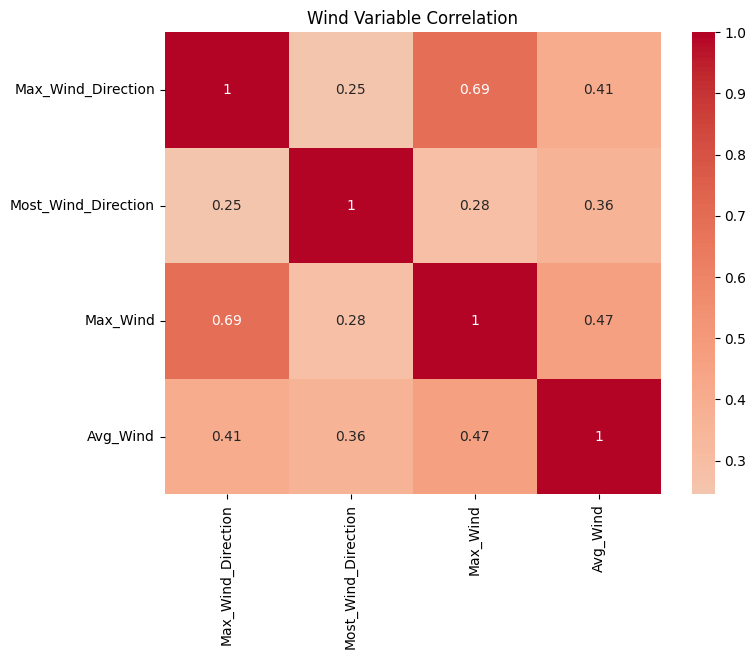

In [391]:
clean_tapanuli['Most_Wind_Direction'] = clean_tapanuli['Most_Wind_Direction'].astype('category').cat.codes

Correlation = clean_tapanuli[['Max_Wind_Direction', 'Most_Wind_Direction','Max_Wind','Avg_Wind']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(Correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Wind Variable Correlation')
plt.show()

The smallest correlation was found between maximum wind direction and most wind direction, with a value of 0.25. The highest value was found between maximum wind and maximum wind direction, with a value of 0.69. This indicates that annual changes in maximum wind, average wind, maximum wind direction, and most wind direction also fluctuate, either increasing or decreasing.